In [8]:
import datacube
from datacube.storage import masking
from datacube import Datacube
from datetime import datetime
from skimage import exposure

#load requiered modules #load r 
import numpy as np
import rasterio
from rasterio import features
#from matplotlib import pyplot as plt #don't need unless want to plot
import xarray as xr
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [53]:
def load_gfif_full(file_name, x=1):


    dataset = rasterio.open(file_name, 'r', driver='GTiff') #open using Raterio
    {i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}
    data_array = dataset.read(x) #read selected band into np array
    data_xr = xr.DataArray(data_array) #turn into Xr array for fuctionality #Now don't need xr yet
    return(data_xr) #return np array into program 

In [45]:
help(rasterio.open)

Help on function open in module rasterio:

open(fp, mode='r', driver=None, width=None, height=None, count=None, crs=None, transform=None, dtype=None, nodata=None, **kwargs)
    Open a dataset for reading or writing.
    
    The dataset may be located in a local file, in a resource located by
    a URL, or contained within a stream of bytes.
    
    In read ('r') or read/write ('r+') mode, no keyword arguments are
    required: these attributes are supplied by the opened dataset.
    
    In write ('w') mode, the driver, width, height, count, and dtype
    keywords are strictly required.
    
    Parameters
    ----------
    fp : str or file object
        A filename or URL, or file object opened in binary ('rb') mode
    mode : str, optional
        'r' (read, the default), 'r+' (read/write), or 'w' (write)
    driver : str, optional
        A short format driver name (e.g. "GTiff" or "JPEG") or a list of
        such names (see GDAL docs at
        http://www.gdal.org/formats_list.

In [75]:
panda_training= pd.read_csv('/g/data/u46/users/ck9738/Datasets/madtrees_kfold.csv', usecols=(2,3,4,8))
panda_training

,smad,max_g,min_g,answer
0,0.003819,0.568426,0.554565,1
1,0.004686,0.590075,0.579466,1
2,0.002380,0.495517,0.488814,0
3,0.003377,0.611683,0.599394,1
4,0.025410,0.511033,0.426060,0
5,0.004539,0.399265,0.387370,0
6,0.002915,0.619306,0.607752,1
7,0.008528,0.486894,0.475318,0
8,0.006350,0.406166,0.407847,0
9,0.011653,0.525308,0.495964,0


In [72]:


np_x = panda_training['smad'].values.tolist()
np_y = panda_training['max_g'].values.tolist()
np_z = panda_training['min_g'].values.tolist()
classification = panda_training['answer'].values.tolist()
#create array of features to use in classifier 
how_many = len(np_y)
how_many

features = []

for i in range(how_many):
    features.append((np_x[i],np_y[i],np_z[i]))
features
features_array = np.asarray(features)

classification_array = np.asarray(classification)

KeyError: 'Variation'

In [11]:
classification_array

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
features_array 

array([[0.00714351, 0.67363495, 0.62958115],
       [0.00467985, 0.6693569 , 0.6437405 ],
       [0.00544358, 0.6596582 , 0.6252777 ],
       ...,
       [0.008959  , 0.4249685 , 0.37304375],
       [0.03761126, 0.6157719 , 0.50086665],
       [0.01104896, 0.52407956, 0.4854343 ]])

In [13]:
#classify = LinearSVC(random_state=0)
classify = RandomForestClassifier(bootstrap=False, max_depth=10, random_state=0)

In [14]:
classify.fit(features_array,classification_array)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
help(classify.predict)

Help on method predict in module sklearn.ensemble.forest:

predict(X) method of sklearn.ensemble.forest.RandomForestClassifier instance
    Predict class for X.
    
    The predicted class of an input sample is a vote by the trees in
    the forest, weighted by their probability estimates. That is,
    the predicted class is the one with highest mean probability
    estimate across the trees.
    
    Parameters
    ----------
    X : array-like or sparse matrix of shape = [n_samples, n_features]
        The input samples. Internally, its dtype will be converted to
        ``dtype=np.float32``. If a sparse matrix is provided, it will be
        converted into a sparse ``csr_matrix``.
    
    Returns
    -------
    y : array of shape = [n_samples] or [n_samples, n_outputs]
        The predicted classes.



In [16]:
test = np.random.randint(1,high=20,size=(15,10,10))

In [17]:
flat_test = test.reshape(15,100)
flat_test.shape

(15, 100)

In [18]:
test.shape

(15, 10, 10)

In [51]:
sample_file = '/g/data/u46/users/dxr251/woody-v6/woody_60_-149.tif'

sample_data = load_gfif_full(sample_file, x=(1,2,3))
sample_data

<xarray.DataArray (dim_0: 3, dim_1: 1000, dim_2: 1000)>
array([[[0.013063, 0.013131, ..., 0.006124, 0.006593],
        [0.013734, 0.013167, ..., 0.006583, 0.004495],
        ...,
        [0.00996 , 0.010427, ..., 0.004107, 0.004645],
        [0.012028, 0.009467, ..., 0.001742, 0.003849]],

       [[0.374153, 0.376019, ..., 0.693144, 0.669847],
        [0.377847, 0.379002, ..., 0.677447, 0.653136],
        ...,
        [0.459452, 0.466307, ..., 0.540635, 0.560477],
        [0.472873, 0.462249, ..., 0.45559 , 0.521387]],

       [[0.350644, 0.350466, ..., 0.631847, 0.606604],
        [0.347751, 0.347789, ..., 0.627827, 0.609666],
        ...,
        [0.442799, 0.448   , ..., 0.519219, 0.531263],
        [0.453587, 0.445638, ..., 0.449587, 0.509299]]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1, dim_2

In [52]:
sample_data.crs

AttributeError: 'DataArray' object has no attribute 'crs'

In [20]:
sample_dataset = sample_data.to_dataset(dim='dim_0')

In [21]:
sample_data

<xarray.DataArray (dim_0: 3, dim_1: 1000, dim_2: 1000)>
array([[[0.013063, 0.013131, ..., 0.006124, 0.006593],
        [0.013734, 0.013167, ..., 0.006583, 0.004495],
        ...,
        [0.00996 , 0.010427, ..., 0.004107, 0.004645],
        [0.012028, 0.009467, ..., 0.001742, 0.003849]],

       [[0.374153, 0.376019, ..., 0.693144, 0.669847],
        [0.377847, 0.379002, ..., 0.677447, 0.653136],
        ...,
        [0.459452, 0.466307, ..., 0.540635, 0.560477],
        [0.472873, 0.462249, ..., 0.45559 , 0.521387]],

       [[0.350644, 0.350466, ..., 0.631847, 0.606604],
        [0.347751, 0.347789, ..., 0.627827, 0.609666],
        ...,
        [0.442799, 0.448   , ..., 0.519219, 0.531263],
        [0.453587, 0.445638, ..., 0.449587, 0.509299]]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1, dim_2

In [22]:
sample_stack = sample_data.stack(z=('dim_1','dim_2'))
sample_stack

<xarray.DataArray (dim_0: 3, z: 1000000)>
array([[0.013063, 0.013131, 0.012596, ..., 0.003196, 0.001742, 0.003849],
       [0.374153, 0.376019, 0.377673, ..., 0.440183, 0.45559 , 0.521387],
       [0.350644, 0.350466, 0.346844, ..., 0.434148, 0.449587, 0.509299]],
      dtype=float32)
Coordinates:
  * z        (z) MultiIndex
  - dim_1    (z) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
  - dim_2    (z) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
Dimensions without coordinates: dim_0

In [23]:
sample_stack = sample_stack.transpose()

In [24]:
results=classify.predict(sample_stack)

In [25]:
results_back = results.reshape(1000,1000)

In [64]:
results_xr = xr.DataArray(results_back,dims=('dim_1', 'dim_2'),name=None)


AttributeError: 'DataArray' object has no attribute 'type'

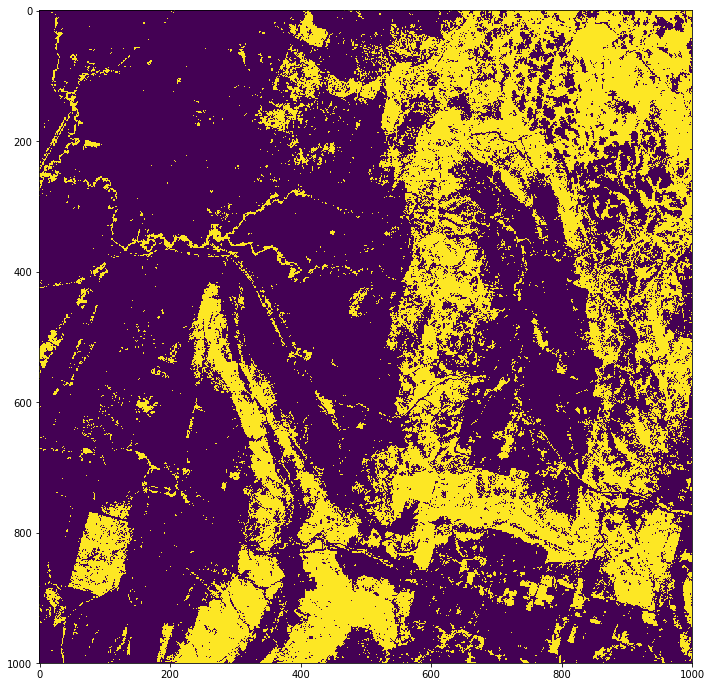

In [35]:

fig, ax = plt.subplots(figsize = (12,12))
cax = ax.imshow(results_back)
#plt.title('pixle drill points')
#plt.scatter(*zip(*randlist),c='r', s=60)
#cax.set_clim(0, 35)
plt.show()

In [36]:
sample_dataset['classification'] = (results_xr)

In [66]:
results_xr

<xarray.DataArray (dim_1: 1000, dim_2: 1000)>
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Dimensions without coordinates: dim_1, dim_2

In [30]:
result_out_panda = sample_dataset.to_dataframe()
result_out_panda.to_csv('/g/data/u46/users/ck9738/Datasets/RF_class_b_test.csv')

TypeError: DataArray.name or Dataset key must be either a string or None for serialization to netCDF files

In [57]:
sample_dataset.shape

AttributeError: 'Dataset' object has no attribute 'shape'

In [40]:
def dataset_to_geotiff(filename, data):

    """
    this function uses rasterio and numpy to write a multi-band geotiff for one
    timeslice, or for a single composite image. It assumes the input data is an
    xarray dataset (note, dataset not dataarray) and that you have crs and affine
    objects attached, and that you are using float data. future users
    may wish to assert that these assumptions are correct.
    Last modified: March 2018
    Authors: Bex Dunn and Josh Sixsmith
    Modified by: Claire Krause, Robbi Bishop-Taylor
    inputs
    filename - string containing filename to write out to
    data - dataset to write out
    Note: this function currently requires the data have lat/lon only, i.e. no
    time dimension
    """

    # Depreciation warning for write_geotiff
    print("This function will be superceded by the 'write_geotiff' function from 'datacube.helpers'. "
          "Please revise your notebooks to use this function instead")

    kwargs = {'driver': 'GTiff',
              'count': len(data.data_vars),  # geomedian no time dim
              'width': data.sizes['x'], 'height': data.sizes['y'],
              'crs': data.crs.crs_str,
              'transform': data.affine,
              'dtype': list(data.data_vars.values())[0].values.dtype,
              'nodata': 0,
              'compress': 'deflate', 'zlevel': 4, 'predictor': 3}
    # for ints use 2 for floats use 3}

    with rasterio.open(filename, 'w', **kwargs) as src:
        for i, band in enumerate(data.data_vars):
            src.write(data[band].data, i + 1)

In [71]:
with rasterio.open('/g/data/u46/users/ck9738/Datasets/new_g.tif', 'w', driver='GTiff', height=1000,
                   width=1000, count=1, dtype=results_xr.type)as dst:
    dst.write(results_xr,1)

AttributeError: 'DataArray' object has no attribute 'type'

In [68]:
results_xr.shape

(1000, 1000)